# Load mnist

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

2025-10-01 20:41:34.573458: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-01 20:41:34.585095: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-01 20:41:35.009555: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-01 20:41:38.469813: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

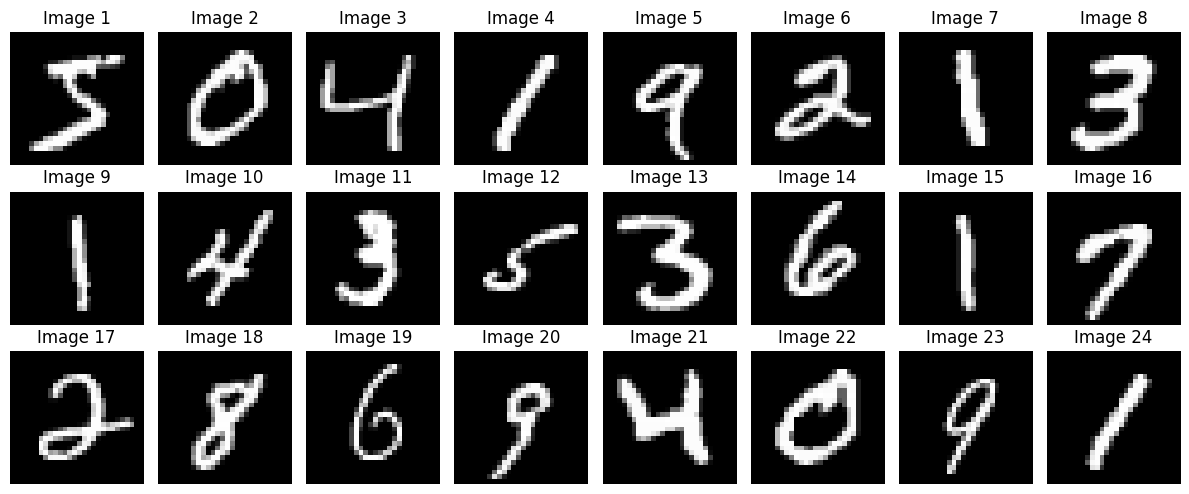

In [3]:
# Plot multiple images in a grid
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 8, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')  
    ax.set_title(f"Image {i + 1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

# Normalize the pixel values to the range [0, 1]
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

print("Preprocessing complete.")

# Apply FFT to images

In [2]:
def fft_transform(images):
    fft_images = []
    for img in images:
        # Compute 2D FFT
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)  # center low frequencies
        magnitude = np.abs(fshift)   # magnitude spectrum
        magnitude = np.log(1 + magnitude)  # compress dynamic range
        fft_images.append(magnitude)
    return np.array(fft_images)

x_train_fft = fft_transform(x_train)
x_test_fft = fft_transform(x_test)

# Reshape for CNN (add channel dimension)
x_train_fft = x_train_fft[..., np.newaxis]
x_test_fft = x_test_fft[..., np.newaxis]

print("FFT shape:", x_train_fft.shape)


FFT shape: (60000, 28, 28, 1)


# Preprocessing

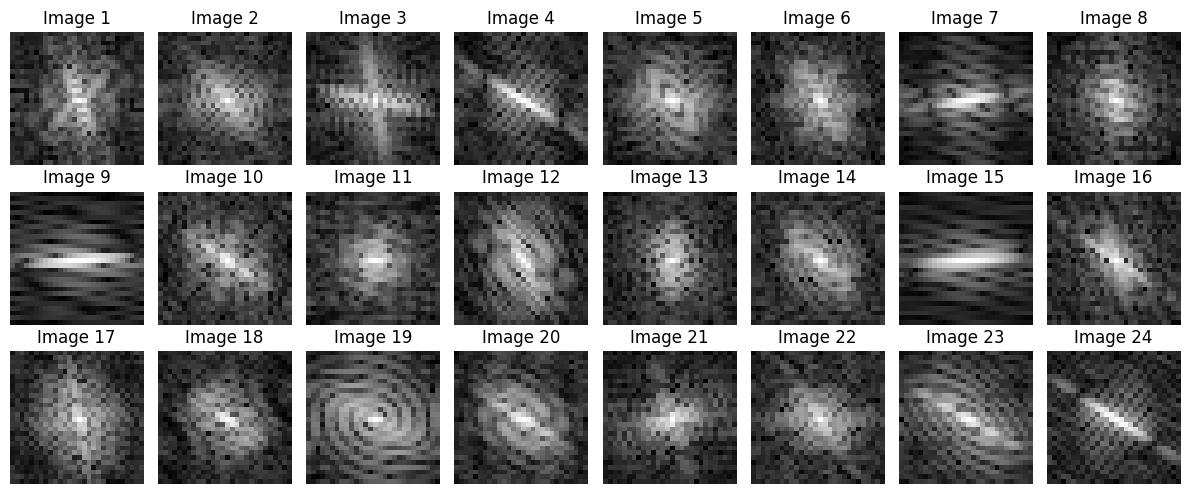

In [4]:
# Plot multiple images in a grid
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 8, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train_fft[i], cmap='gray')  
    ax.set_title(f"Image {i + 1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Build a CNN on FFT images

In [8]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x_train_fft, y_train, epochs=10, batch_size=32, validation_split=0.2)


/home/david/Documentos/estudios/2025-2 ITM/EII/venv-eii/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.5758 - loss: 1.1478 - val_accuracy: 0.8131 - val_loss: 0.5536
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.8126 - loss: 0.5649 - val_accuracy: 0.8647 - val_loss: 0.4117
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.8676 - loss: 0.4110 - val_accuracy: 0.8991 - val_loss: 0.2907
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.8908 - loss: 0.3417 - val_accuracy: 0.9167 - val_loss: 0.2543
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9042 - loss: 0.2988 - val_accuracy: 0.9182 - val_loss: 0.2511
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9119 - loss: 0.2733 - val_accuracy: 0.9284 - val_loss: 0.2129
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9201 - loss: 0.2496 - val_accuracy: 0.9273 - val_loss: 0.2194
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9249 -

# Evaluate

In [ ]:
test_loss, test_acc = model.evaluate(x_test_fft, y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

  8/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9059 - loss: 0.2854  

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9361 - loss: 0.1919
Test accuracy: 0.9361000061035156
Test loss: 0.19192415475845337
